In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from scipy import stats 

#display all columns of Data Frame
pd.options.display.max_columns = None

#display all rows of Data Frame
pd.options.display.max_rows = None

#to supress the notaion 'e'
pd.options.display.float_format = '{:.6f}'.format

 
# import various metrics from 'Scikit-learn' (sklearn) 
from sklearn.model_selection import train_test_split 

# 'Statsmodels' is used to build and analyze various statistical models import statsmodels 
import statsmodels.api as sm 
import statsmodels.stats.api as sms 
import statsmodels.formula.api as smf 
from statsmodels.tools.eval_measures import rmse 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt 
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

#scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('model_data_1.csv')

In [6]:
df.head()

,Age,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Min new price_boxcox,Max new price_boxcox,km_driven_boxcox,selling_price_boxcox
0,0.904671,1.159240,0.954444,0.478100,0.010346,-1.322614,-1.281014,-0.383512,-2.387438,-3.090250,1.500426,-2.374496
1,-0.405892,1.159240,0.954444,0.478100,-0.189647,-0.513822,-0.387656,-0.383512,-0.255887,-0.682937,-1.098101,0.079590
2,1.559952,1.159240,0.954444,0.478100,-0.664630,-0.513822,-0.437704,-0.383512,-0.061377,0.322403,0.320688,-1.372344
3,0.904671,1.159240,0.954444,0.478100,0.315335,-0.915193,-0.760514,-0.383512,-1.870991,-1.869337,-0.363692,-1.290327
4,-0.078251,-0.794128,-0.962711,0.478100,0.777818,0.093275,0.027493,-0.383512,0.346181,0.383035,-0.630012,0.131130


In [7]:
df.columns

Index(['Age', 'seller_type', 'fuel_type', 'transmission_type', 'mileage',
       'engine', 'max_power', 'seats', 'Min new price_boxcox',
       'Max new price_boxcox', 'km_driven_boxcox', 'selling_price_boxcox'],
      dtype='object')

In [35]:
X = df.drop(['selling_price_boxcox'],axis=1)
Xc = sm.add_constant(X)
y = df['selling_price_boxcox']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(Xc,y,test_size=0.3,random_state=1)

In [37]:
base_model = sm.OLS(y_train,X_train).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     selling_price_boxcox   R-squared:                       0.886
Model:                              OLS   Adj. R-squared:                  0.886
Method:                   Least Squares   F-statistic:                     8587.
Date:                  Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                          15:19:57   Log-Likelihood:                -4101.6
No. Observations:                 12175   AIC:                             8227.
Df Residuals:                     12163   BIC:                             8316.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0025      0.003      0.818      0.413      -0.004       0.009
Age                     -0.5061      0.004   -124.847      0.000      -0.514      -0.498
seller_type             -0.0600      0.003    -18.704      0.000      -0.066      -0.054
fuel_type               -0.0501      0.005     -9.553      0.000      -0.060      -0.040
transmission_type       -0.0920      0.004    -24.410      0.000      -0.099      -0.085
mileage                  0.0480      0.006      7.993      0.000       0.036       0.060
engine                   0.0796      0.008      9.419      0.000       0.063       0.096
max_power                0.2358      0.007     31.572      0.000       0.221       0.250
seats                    0.0562      0.005     12.159      0.000       0.047       0.065
Min new price_boxcox     0.1740      0.013     13.268      0.000       0.148       0.200
Max new price_boxcox     0.2341      0.013     18.518      0.000       0.209       0.259
km_driven_boxcox        -0.0296      0.004     -7.541      0.000      -0.037      -0.022
==============================================================================
Omnibus:                     1454.122   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4520.792
Skew:                          -0.624   Prob(JB):                         0.00
Kurtosis:                       5.711   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
y_pred_train = base_model.predict(X_train)
y_pred_test = base_model.predict(X_test)

In [39]:
print(mean_absolute_error(y_pred_train,y_train))
print(mean_absolute_error(y_pred_test,y_test))

0.25309570003372844
0.25611687272961836


In [40]:
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

0.1148522969792539
0.11288916105462522


In [41]:
print(np.sqrt(mean_squared_error(y_pred_train,y_train)))
print(np.sqrt(mean_squared_error(y_pred_test,y_test)))

0.33889865296169874
0.33598982284382545


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif_values"] = [variance_inflation_factor(df.values , i ) for i in range (df.shape[1])]
vif['Variables'] = df.columns

In [43]:
vif

,vif_values,Variables
0,3.942211,Age
1,1.102819,seller_type
2,2.924495,fuel_type
3,1.572280,transmission_type
4,3.827383,mileage
5,7.604590,engine
6,6.373603,max_power
7,2.300942,seats
8,18.282256,Min new price_boxcox
9,17.264385,Max new price_boxcox


In [44]:
X = df.drop(['selling_price_boxcox','Min new price_boxcox'],axis=1)
Xc = sm.add_constant(X)
y = df['selling_price_boxcox']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(Xc,y,test_size=0.3,random_state=1)

In [46]:
model_1 = sm.OLS(y_train,X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     selling_price_boxcox   R-squared:                       0.884
Model:                              OLS   Adj. R-squared:                  0.884
Method:                   Least Squares   F-statistic:                     9294.
Date:                  Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                          15:21:07   Log-Likelihood:                -4189.0
No. Observations:                 12175   AIC:                             8400.
Df Residuals:                     12164   BIC:                             8482.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0027      0.003      0.873      0.383      -0.003       0.009
Age                     -0.4996      0.004   -123.269      0.000      -0.508      -0.492
seller_type             -0.0622      0.003    -19.266      0.000      -0.068      -0.056
fuel_type               -0.0662      0.005    -12.882      0.000      -0.076      -0.056
transmission_type       -0.0932      0.004    -24.560      0.000      -0.101      -0.086
mileage                  0.0424      0.006      7.032      0.000       0.031       0.054
engine                   0.0877      0.008     10.330      0.000       0.071       0.104
max_power                0.2457      0.007     32.826      0.000       0.231       0.260
seats                    0.0545      0.005     11.713      0.000       0.045       0.064
Max new price_boxcox     0.3784      0.006     58.366      0.000       0.366       0.391
km_driven_boxcox        -0.0289      0.004     -7.312      0.000      -0.037      -0.021
==============================================================================
Omnibus:                     1493.894   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4821.737
Skew:                          -0.630   Prob(JB):                         0.00
Kurtosis:                       5.814   Cond. No.                         6.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
df_copy = df.copy()

In [48]:
df_copy.drop(['selling_price_boxcox','Min new price_boxcox'],axis=1,inplace=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif_values"] = [variance_inflation_factor(df_copy.values , i ) for i in range (df_copy.shape[1])]
vif['Variables'] = df_copy.columns

In [50]:
vif

,vif_values,Variables
0,1.716679,Age
1,1.072029,seller_type
2,2.747128,fuel_type
3,1.499493,transmission_type
4,3.788718,mileage
5,7.525346,engine
6,5.829364,max_power
7,2.266952,seats
8,4.369883,Max new price_boxcox
9,1.658144,km_driven_boxcox


In [51]:
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

In [52]:
print(np.sqrt(mean_squared_error(y_pred_train,y_train)))
print(np.sqrt(mean_squared_error(y_pred_test,y_test)))

0.34134249867050626
0.33923434396701085


Regression Plot


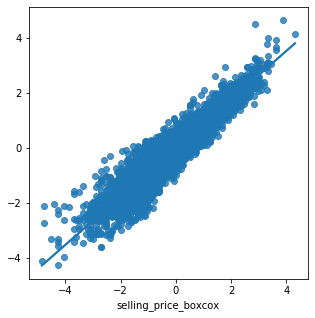

In [53]:
print("Regression Plot")
plt.figure(figsize=(5,5))
sns.regplot(y_train , y_pred_train)

Regression Plot


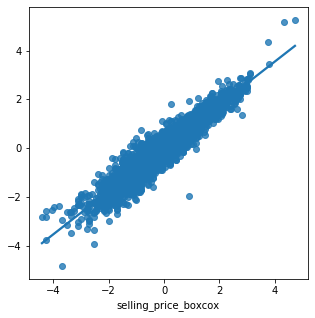

In [54]:
print("Regression Plot")
plt.figure(figsize=(5,5))
sns.regplot(y_test , y_pred_test)

In [68]:
## Step-10 : Plot r2 and RMSE against n_features
metrics=pd.DataFrame({"RMSE":[np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))],
                      "R2":[r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)]},index=["Train","Test"])
#metrics['RMSE'] = metrics['RMSE'] * (10**11)

<Figure size 504x360 with 0 Axes>

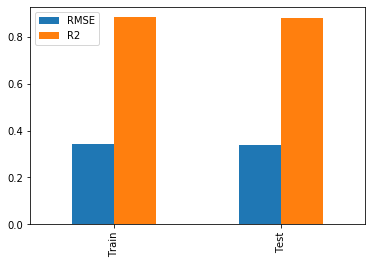

In [69]:
plt.figure(figsize=(7,5))
metrics.plot(kind="bar")
plt.show()

# Linear Regression Assumptions Validation

In [77]:
## 1. Linearity of Model 
stat,pval=sm.stats.diagnostic.linear_rainbow(model_1,frac=0.5)
print("statval",stat)
print("pval",pval)

statval 0.9532455029809428
pval 0.9690477018847864


In [ ]:
#p>0.05 , hence we fail to reject null and we conclude model linear.

In [74]:
## 2. Homoscedasticity (equal variance) of residuals
import statsmodels.stats.api as sms
residuals = model_1.resid
sms.het_goldfeldquandt(y=residuals, x=X_train)

(1.0037622970962754, 0.4418191518188324, 'increasing')

In [ ]:
## Since p-value>005 we fail to reject H0, to conclude that variance of residuals is constant.

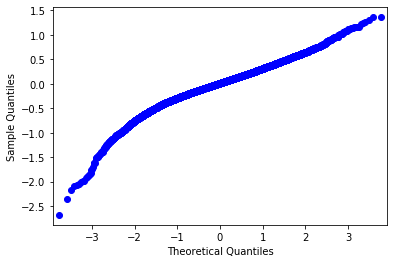

In [71]:
## 3. Normality of Residuals
residuals = model_1.resid
sm.qqplot(residuals)
plt.show()

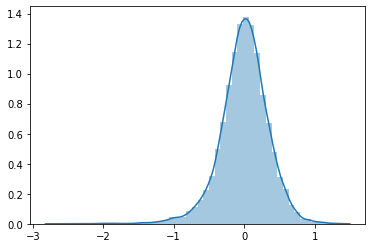

In [85]:
sns.distplot(model_1.resid)

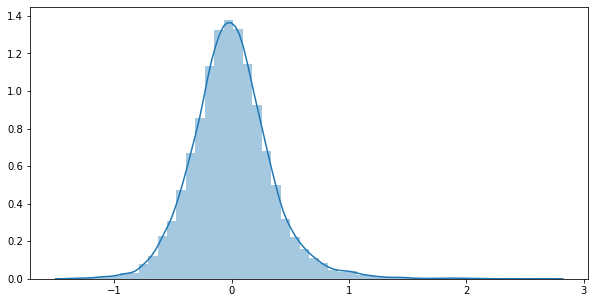

In [92]:
error = y_pred_train - y_train
plt.figure(figsize=(10,5))
sns.distplot(error)

In [87]:
#K-Fold Cross Validation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=3,shuffle=True)
cv=cross_val_score(lr,X=X,y=y,cv=kfold,scoring="r2")

er=cross_val_score(lr,X=X,y=y,cv=3,scoring="neg_mean_squared_error")
print("cv mean is            :",cv.mean())
print("Minimum value is      :",cv.min())
print("Maximum values is     :",cv.max())
print('Mean_Squared_error is :',np.sum(np.abs(er)))

cv mean is            : 0.8838603309085826
Minimum value is      : 0.883088066228936
Maximum values is     : 0.8851269452623653
Mean_Squared_error is : 0.35136042400930156


In [88]:
from sklearn.linear_model import LinearRegression
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lin_reg = LinearRegression()

In [89]:
sfs_reg = sfs(lin_reg,k_features=6,forward=True,scoring='r2')
forward_model = sfs_reg.fit(Xc,y)
print("Features using Forward Selection:",forward_model.k_feature_names_)

Features using Forward Selection: ('Age', 'fuel_type', 'transmission_type', 'max_power', 'seats', 'Max new price_boxcox')


In [90]:
sfs_reg = sfs(lin_reg,k_features=5,forward=False,scoring='r2')
backward_model = sfs_reg.fit(Xc,y)
print("Features using Backward Selection:",backward_model.k_feature_names_)

Features using Backward Selection: ('Age', 'fuel_type', 'transmission_type', 'max_power', 'Max new price_boxcox')
